결정 트리 (Decision tree)
----

- 분류와 회귀 문제에 널리 사용하는 모델.
- 결정에 다다르기 위해 예/아니오 질문을 이어나가며 학습
    - 예시: 스무고개로 대상 좁히기
    - 정답에 '가장 빨리' 도달하는 질문 목록을 학습하는 것이 핵심.
    - 보통 각 질문은 특정 $i$가 값 $a$보다 큰가? 라는 형태임.
        - 영역을 분할해 나가는 알고리즘.
    
    - 회귀의 경우: 새로운 data의 y 값은, 그 새로운 data point 가 도달한 leaf node 에 속한 기존 학습 data 들의 y 값의 평균으로.
- 결정 트리의 장점.
    - 모델의 시각화가 용이함.
    - 데이터의 scale에 크게 구애받지 않음. (각 특성이 개별적으로 처리되므로.)
        - 특성의 정규화나 표준화 같은 과정이 필요 없음.
    - 이진특성과 연속 특성이 섞여 있어도 괜찬음.
- 결정 트리의 단점
    - 일반화 성능이 별로 좋지 않음. 과대적합되는 경우가 많다.

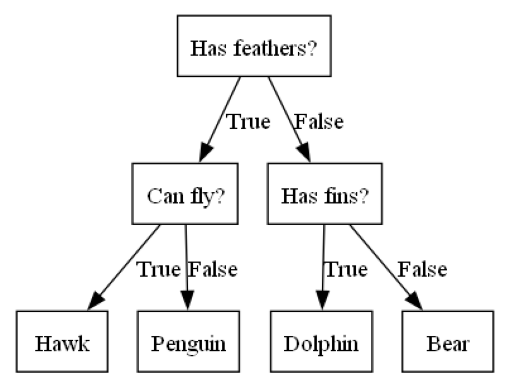

In [4]:
import mglearn

mglearn.plots.plot_animal_tree()

#참고 graphviz 설치해야 함. 
#exe 파일로 설치한 뒤, python package인 graphviz로 그것에 연결해야 함.

과대적합을 막는 문제.
- 모든 leaf node가 순수 노드가 될 때까지 진행하면 모델이 훈련 데이터에 과적합된다.
- 이를 막기 위해서,
    - 트리 생성을 일찍 중단 (사전 가지치기 pre-pruning 또는 그냥 가지치지 pruning)
        - 트리의 최대 깊이나 리프의 최대개수를 제한함.
            - max_depth
            - max_leaf_nodes
        - 또는 리프가 분할하기 위한 포인트의 최소 개수를 제한함. 10 정도 깊이는 보통이라고 함.
            - min_sample_leaf
        - 이런 parameter 중 하나만 적절히 지정해도 과적합 막는데는 충분

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)


tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도:{:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.937


In [2]:
# 과대 적합 방지를 막기위한 사전 가지치지
# 트리의 최대 깁이를 제한하는 방식.
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도:{:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도:0.988
테스트 세트 정확도:0.951


### 트리를 시각화하는 방법. 
- 그래프 저장용 텍스트 파일 (.dot)을 만들어 줌.
- 이 파일을 읽어서 graphviz 모듈을 이용해 시각화 할 수 있음.

In [3]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"], feature_names=cancer.feature_names,
                impurity=False, filled=True)
#class_names 는 이 데이터의 class name인 cancer.target_names 에 내가 새로이 이름을 붙여주는 것 같은데. 필요하면 확인해 볼 것.
#filled=True이면 노드의 클래스가 구분되도록 색을 칠해줌.

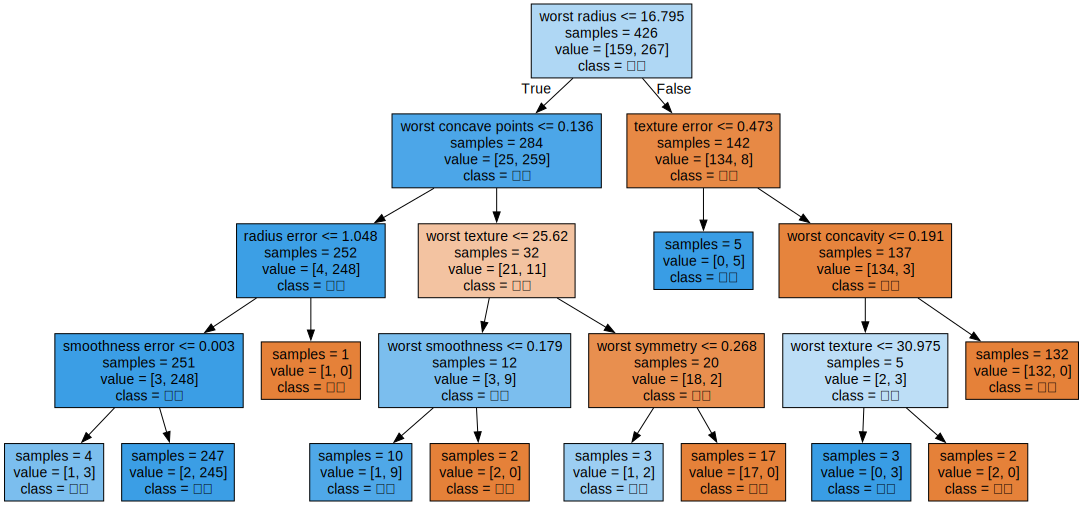

In [5]:
import graphviz
with open("tree.dot", encoding="utf8") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### 트리의 특성 중요도
- 트리가 어떻게 작동한느지 요약하는 속성을 통해 트리를 이해하려는 시도.
    - 특성 중요도(feature importance)를 사용.
        - 트리를 만드는 결정에 각 속성이 얼마나 중요한지 가리킨다.
        - 0~1 사이의 수로, 0이면 전혀 사용되지 않음. 1은 완벽하게 class 를 예측함.
        - 특성 중요도의 전체 합은 1이 된다.
        - 어떤 특성의 특성 중요도가 낮은 것은 그 특성이 중요하지 않아서일 수 있지만, 다른 특성과 그 class 구분 역할이 겹쳐서 그 다른 특성이 대신 쓰인 것일 수 있다.

In [8]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


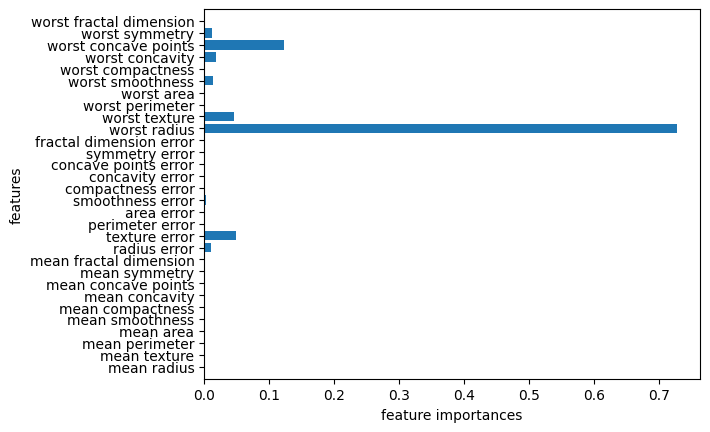

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[-1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)

plot_feature_importance_cancer(tree)

### 회귀 트리
- 분류 트리와 비슷함.
- 훈련 데이터 범위 밖의 포인트 (외삽 extrapolation)에서는 예측이 불가능.

Text(0, 0.5, 'price ($/Mbyte)')

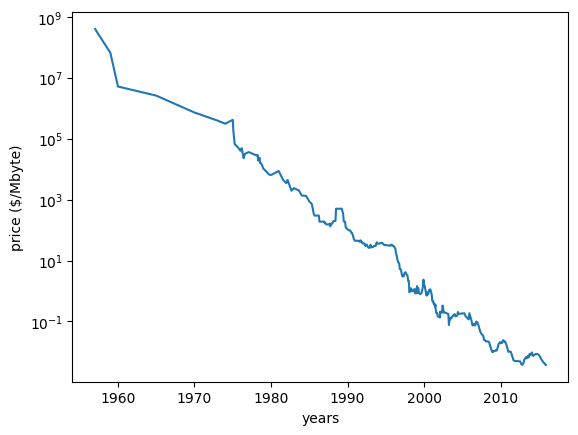

In [19]:
import os
import mglearn
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("years")
plt.ylabel("price ($/Mbyte)")

In [40]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date.to_numpy()[:,np.newaxis]
#date 특성만 사용함
#np.newaxis는 (202,) --> (202,1) 형태가 되도록 한 것.
y_train = np.log(data_train.price)
#log 스케일로 변환해서 학습함. 이것은 요령인 듯.

tree = DecisionTreeRegressor().fit(X_train, y_train)

X_all = ram_prices.date.to_numpy()[:, np.newaxis]
#전체 기간에 대해서 예측.

pred_tree = tree.predict(X_all)
price_tree = np.exp(pred_tree)
#앞서서 log 씌운 값을 train에 사용하였으니 이를 복구함.

In [41]:
#linear regression 과도 비교해 보기.
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression().fit(X_train, y_train)
pred_lr = linear_reg.predict(X_all)

price_lr = np.exp(pred_lr)

tree의 경우는 training data 밖에 대해서는 전혀 예측을 못하고, 그 new point 에 가장 가까운 training data 의 결과값을 써버린다.


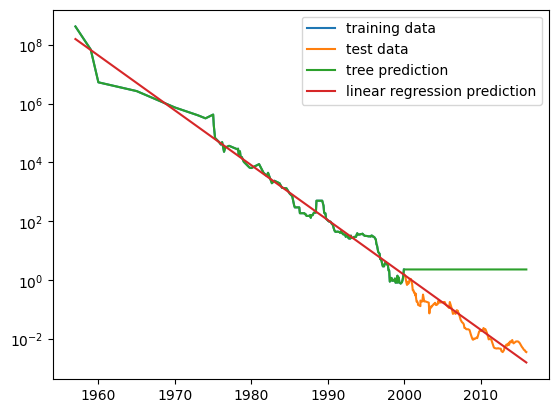

In [45]:
plt.semilogy(data_train.date, data_train.price, label="training data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="linear regression prediction")
plt.legend()
print("tree의 경우는 training data 밖에 대해서는 전혀 예측을 못하고, 그 new point 에 가장 가까운 training data 의 결과값을 써버린다.")